# LIBRARIES


In [8]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# INISIASI DATASET


In [2]:
# import
PREPROCESSED_DATASET_FILE_NAME = "eng-preprocessed.csv"
PREPROCESSED_DATASET_FILE_PATH = f"outputs/{PREPROCESSED_DATASET_FILE_NAME}"
DATA_FRAME_PREPROCESSED_DATASET = pd.read_csv(PREPROCESSED_DATASET_FILE_PATH)
DATA_FRAME_PREPROCESSED_DATASET_LENGTH = len(DATA_FRAME_PREPROCESSED_DATASET)
print(f"pre-processed dataset: {DATA_FRAME_PREPROCESSED_DATASET_LENGTH} tweets")
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

pre-processed dataset: 4042 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,translated_text,after_stopwords_text,after_lemmatized_text,eng_preprocessed_text
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,support the relocation of the indonesian capit...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...


# SENTIMENT LABELLING


In [3]:
# inisiasi vader sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [5]:
# polarity score
def get_compound_score(text):
  compound_score = sia.polarity_scores(text)["compound"]
  # print(f"original text: {text}")
  # print(f"compound score: {compound_score}")
  return compound_score

DATA_FRAME_PREPROCESSED_DATASET["compound_score"] = DATA_FRAME_PREPROCESSED_DATASET["eng_preprocessed_text"].apply(get_compound_score)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,translated_text,after_stopwords_text,after_lemmatized_text,eng_preprocessed_text,compound_score
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,support the relocation of the indonesian capit...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,0.8126


In [6]:
# labelling
def get_label(number):
  if number < 0:
    return "negatif"
  elif number == 0:
    return "netral"
  elif number > 0:
    return "positif"
  else:
    return

DATA_FRAME_PREPROCESSED_DATASET["label"] = DATA_FRAME_PREPROCESSED_DATASET["compound_score"].apply(get_label)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,translated_text,after_stopwords_text,after_lemmatized_text,eng_preprocessed_text,compound_score,label
4041,1685924328851038208,maulani_salsa76,Maulani Salsa,1822028454411563237,@aminun40 Dukung pemindahan Ibu Kota Nusantara...,Fri Aug 09 21:53:29 +0000 2024,dukung pemindahan ibu kota nusantara untuk men...,dukung pemindahan ibu kota nusantara untuk men...,support the relocation of the indonesian capit...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,support relocation indonesian capital optimize...,0.8126,positif


# EXPORT


In [7]:
DATA_FRAME_PREPROCESSED_DATASET.to_csv("outputs/eng-sentiment.csv", index=False)

# FRESH DATASET VS CURRENT DATASET TOTAL DATA


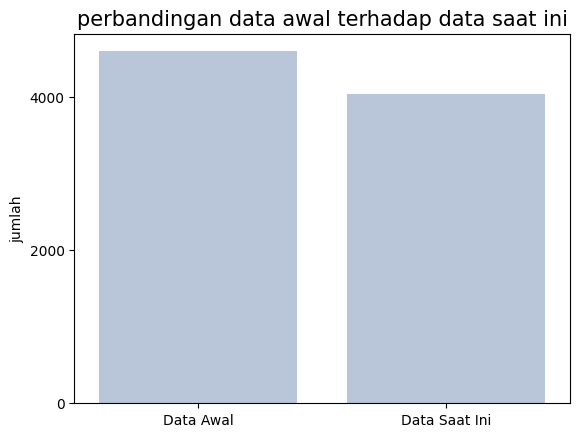

In [9]:
fresh_dataset = pd.read_csv("datasets/merged/merged_dataset.csv")
current_dataset = pd.read_csv("outputs/eng-sentiment.csv")

vol = [['Data Awal', len(fresh_dataset)],
       ['Data Saat Ini', len(current_dataset)]]
df = pd.DataFrame(vol, columns=['dt_type', 'dt_vol'])
sns.set_palette('PuBu',2)
ax = sns.barplot(data=df.reset_index(), x='dt_type', y='dt_vol')
ax.set_ylabel('jumlah')
ax.set_xlabel('')
ax.set_title('perbandingan data awal terhadap data saat ini', fontsize=15)
ax.yaxis.set_ticks(np.arange(0, 5000, 2000))
plt.show()

# PIE CHART


label
positif    2591
netral     1020
negatif     431
Name: count, dtype: int64


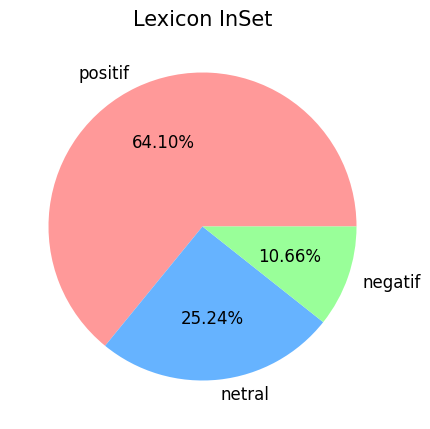

In [10]:
label = DATA_FRAME_PREPROCESSED_DATASET["label"]
label_counts = label.value_counts()
print(label_counts)

positif_perc = label_counts.positif / label_counts.sum() * 100
netral_perc = label_counts.netral / label_counts.sum() * 100
negatif_perc = label_counts.negatif / label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_perc, netral_perc, negatif_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon InSet', fontsize=15)
plt.show()